# Greendeck Machine Learning Assignment

Akshay Kumar Prasad

Contact email id : akshayprasad885@gmail.com

Phone number : 8409787345




# Multi-model learning for Image and Text Semantic classification

Model used for Text analysis : word2vec

Model used for Image  analysis : Transfer Learning - VGGNet16


Brief Introduction about the Dataset and Problem:

1) The Dataset csv "training_data.csv" consists of 65714 products accompanied along with its image name, text and class name.

2) images.zip folder contains all the images mentioned in "training_data.csv" under the image column



I have break down 65714 images into two parts: 75% in train images(49,267 Files in 48 Folders according to their classes) and 25% in test images(16,447 Files in 48 Folders according to their classes) for further model building.

In [ ]:
# This separating part of the code I have done in my local system. 

# Importing libraries
import pandas as pd
import numpy as np
import os
import shutil

# Reading data from file
data = pd.read_csv("training.csv")
# Grouping by class and image and Converting that to dataframe
dataf = pd.DataFrame(data.groupby("classes")["image"].unique())
# Creating list of 48 folder and their respective product
folder = []
for i in dataf.index:
    folder.append(i)
product = []
for j in range(len(folder)):
    for i in dataf.iloc[j]:
        product.append(i)

# Separating train and test files. Train file: having train image and test file having test images
train = []
test = []
for i in range(len(product)):
    train.append(list(product[i][0:int(len(product[i])*0.75)]))
    test.append(list(product[i][int(len(product[i])*0.75):]))

# Separating csv file to train file
train_data = []
for i in train:
    for j in i:
        train_data.append(data.iloc[data["image"].values == j].index)
training = data.iloc[[train_data[i][0] for i in range(len(train_data))]]   
training.to_csv(r"D:\Data Science\Hackathon\Greendeck\train.csv")

# Separating csv file to test file
test_data = []
for i in test:
    for j in i:
        test_data.append(data.iloc[data["image"].values == j].index)
testing = data.iloc[[test_data[i][0] for i in range(len(test_data))]]   
testing.to_csv(r"D:\Data Science\Hackathon\Greendeck\test.csv")

# Creating folders for different commodities
folders = []
for i in range(len(dataf.index)):
    folders.append(list(dataf.index[i].split("<")[1:]))
#7. Creating path of different folder in train dataset created above
paths_train = []
path_train = "D:/Data Science/Hackathon/Greendeck/items/train/"

for i in range(len(dataf.index)):
    paths_train.append(path_train+folders[i][0]+"_"+folders[i][1]+"/") 

# Creating path of different folder in test dataset created above
paths_test = []
path_test = "D:/Data Science/Hackathon/Greendeck/items/test/"

for i in range(len(dataf.index)):
    paths_test.append(path_test+folders[i][0]+"_"+folders[i][1]+"/") 

    
# Creating directories in local system for train
for i in range(len(paths_train)):
    try:
        os.mkdir(paths_train[i])
    except OSError:
        print ("Creation of the directory %s failed" % path_train)
    else:
        print ("Successfully created the directory %s " % path_train)  
        
# Creating directories in local system for test 
for i in range(len(paths_test)):
    try:
        os.mkdir(paths_test[i])
    except OSError:
        print ("Creation of the directory %s failed" % path_test)
    else:
        print ("Successfully created the directory %s " % path_test)         

# For moving file from source to train folder
n = 0
while n <= 47:
    
    # Source file : Ready
    source_train = []
    destiny_train = []
    for j in train[n]:
        source_train.append(paths_train[n]+j)

    # Destination file : ready
    for i in range(len(train[n])):
        destiny_train.append(paths_train[n]+train[n][i])

    # moving
    for i in range(len(source)):
        shutil.move(source_train[i], destiny_train[i])
    n = n+1

    

# For moving file from source to test folder
n = 0
while n <= 47:
    
    # Source file : Ready
    source_test = []
    destiny_test = []
    for j in test[n]:
        source_test.append(paths_test[n]+j)

    # Destination file : ready
    for i in range(len(test[n])):
        destiny_test.append(paths_test[n]+test[n][i])

    # moving
    for i in range(len(source)):
        shutil.move(source_test[i], destiny_test[i])
    n = n+1


   
    

# PART 1

Importing important libraries

In [ ]:
import os
import shutil
from os import listdir
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import gensim
from string import punctuation
from nltk import word_tokenize
import re
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import layers
from keras import Input
from keras.models import Model
from keras import models
from keras.applications import VGG16
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Mounting Google Drive to read files saved in Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Text  Embeddings Input Model (10 points)

1.Reading training.csv files from google drive 

2.Setting the index to classes column

In [ ]:
df =  pd.read_csv('/content/gdrive/My Drive/HUSE/training.csv')
df.set_index(['classes'], inplace = True)
df

,image,name
classes,,
beauty<makeup<eyeshadow,5da821eb7f3e301b4504bb4a_0.jpg,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...
beauty<makeup<eyeshadow,5da81cde7861c2af6a5a88cf_0.jpg,Marc Jacobs Beauty Eye-Conic Longwear Eyeshad...
clothing<knitwear<fine knit,5da8219a6504fb65da0050aa_0.jpg,Prada Wool sweater
clothing<pants<straight leg,5da821856504fb65cea703cf_0.jpg,Prada Printed silk-satin twill straight-leg p...
clothing<pants<straight leg,5da82200b25b035d1d17bec6_0.jpg,Prada Cropped chain-trimmed printed crepe str...
...,...,...
beauty<makeup<lipstick,5da817b06504fb65d41c5455_7.jpg,Illamasqua Lipstick - Climax
bags<tote bags<tote bags,5da81f6f6504fb65c4de4009_7.jpg,Chloé Marcie medium textured-leather shoulder...
bags<shoulder bags<shoulder bags,5da81fa5465e00845f490bc4_7.jpg,Gucci Sylvie mini leather-trimmed calf hair s...


Since, the size of data is huge, we are using only some part of it for the ease of model implementation only. Same logic will be applied on whole dataset later for full training purpose.

"Long coats", "casual jackets", "fine knitwear" from clothing section and "necklace" from jewelary and watches section has been randomly chosen for model training and stored in dataframe "df1" 

In [ ]:
df1 = df.loc[['clothing<coats<long','jewelry and watches<fine jewelry<necklaces','clothing<jackets<casual jackets','clothing<knitwear<fine knit']]

#### Brief Inroduction about word2vec word embedding model
word2vec is one of the word embedding model developed by Google pre-trained on Google News. It represent a word in 300 different dimensions or vector forms. It is a shallow two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand.

Word2vec is a computationally efficient predictive model for learning word embeddings from raw text. If we put any raw text on word2vec model and get a embedding on the particular word we will get 300 dimensional vectors forming a dense matrix as opposed to sparse matrix created in Document term matrix. This pretrained model help us in getting a vector representation of our word without any training on local system.

Word2vec allow us to perform linear operations on words. Words can be subtracted or added using linear operation. 

The word embedding approach is able to capture multiple different degrees of similarity between words. Pattern like word "King" is to word "Queen" is similar to word "Man" is to word "Women". This similarity is calculated by the cosine distance between vector representation of two words. Hence, capturing their semantic relationship. Similar words have similar vector representation



Word Embedding is a collective name for those techniques where words are translated into dense low dimensional vectors.





Embedding file is downloaded from the given source file as under and stored in "EMBEDDING_FILE" variable.

In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-05-01 19:40:31--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.15.150
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.15.150|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



The training is streamed, meaning sentences can be a generator, reading input data from disk on-the-fly, without loading the entire corpus into RAM.

In [ ]:
embeddings = gensim.models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary = True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Permanently resetting the index to classes

In [ ]:
df1.reset_index(inplace= True)
df1.head()

,classes,image,name
0,clothing<coats<long,5da82235b25b035d1d17c108_0.jpg,Ann Demeulemeester Convertible belted satin c...
1,clothing<coats<long,5da821b16504fb65da005330_0.jpg,Prada Belted wool-twill coat
2,clothing<coats<long,5da821d3b25b035d1d17bbe7_0.jpg,Gucci Grosgrain-trimmed wool-blend bouclé coat
3,clothing<coats<long,5da821216504fb65da004828_0.jpg,Gucci Leather-trimmed belted cotton-blend can...
4,clothing<coats<long,5da821cdb25b035d1d17bb5b_0.jpg,Danielle Frankel Jean silk and wool-blend sat...


Creating user defined function for text cleaning:

1)  tokens = word_tokenize(re.sub('[^a-z ]',' ', sent.lower())) : First it will convert every word into lower case and then substitute all the non-alphabetical characters with a space. There are some instances in the text where characters like "-" are present. It will remove it with a space and then tokenise the words.

2) stop_updated  = stopwords.words("english") + list(punctuation) : Creating a list of english stopwords and adding punctuation 

3) text = [term for term in tokens if term not in stop_updated and len(term)>2]
  res = " ".join(text) : Now my raw text will be words that are tokenised but not are stopwards and its length is more than 2. Every word in the tokenised list will be joined using space.

In [ ]:
def clean_text(sent):
    tokens = word_tokenize(re.sub('[^a-z ]',' ', sent.lower()))
    stop_updated  = stopwords.words("english") + list(punctuation) 
    text = [term for term in tokens if term not in stop_updated and len(term)>2]
    res = " ".join(text)
    return res

Applying the user defined fucntion on name column of the dataframe. End result will be as described above.

In [ ]:
df1["clean_name"] = df1.name.apply(clean_text)
df1.shape


(4165, 4)

In [ ]:
df1.head()

,classes,image,name,clean_name
0,clothing<coats<long,5da82235b25b035d1d17c108_0.jpg,Ann Demeulemeester Convertible belted satin c...,ann demeulemeester convertible belted satin coat
1,clothing<coats<long,5da821b16504fb65da005330_0.jpg,Prada Belted wool-twill coat,prada belted wool twill coat
2,clothing<coats<long,5da821d3b25b035d1d17bbe7_0.jpg,Gucci Grosgrain-trimmed wool-blend bouclé coat,gucci grosgrain trimmed wool blend boucl coat
3,clothing<coats<long,5da821216504fb65da004828_0.jpg,Gucci Leather-trimmed belted cotton-blend can...,gucci leather trimmed belted cotton blend canv...
4,clothing<coats<long,5da821cdb25b035d1d17bb5b_0.jpg,Danielle Frankel Jean silk and wool-blend sat...,danielle frankel jean silk wool blend satin coat


Every word in "clean_name" column is tokenised.Then all the words in a document is joined and append to list "texts". Then on these texts sequences is created using word index. That means every unique word is assigned a unique number. Since, the length of every document is diffferent, hence we need to equalise them by Padding them at the end of each document sequence. 

In [ ]:
tokenizer = Tokenizer()
texts = []
for tag_list in df1['clean_name']:
    texts.append(''.join(tag_list))
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
tag_data = pad_sequences(sequences, maxlen= None, padding= 'post' )
word_index = tokenizer.word_index
print('Found {} unique tokens'.format(len(word_index)))
  

Found 989 unique tokens


In [ ]:
tag_data.shape

(4165, 14)

Now, to get the vector for every text in the name column by averaging the vector for every word in the name. 

docs_vectors = pd.DataFrame() - An empty dataframe is created 

For every document in dataframe it will create a temporary dataframe(temp) and every word in document will now be in a list (words).

Then for every word in list (words), it will create its embedding and stored in variable word2vec. Further a Pandas Series will be formed and appended in temporary dataframe (temp) for every word in the document.

 **Now for every word in the document, their respective mean will be taken for every dimension. Let's say for example, if a document contains 5 words. Initially, every word will be represented by 300 vectors. After taking mean of all those dimension in every vector space, that document will be represented by the mean of all words in respective dimension**

At last all the 4165 documents present in the corpus will be represented by the vector mean of all the words present in each document as shown in the output.

In [ ]:
docs_vectors = pd.DataFrame()
for doc in df1.clean_name:
    temp = pd.DataFrame()
    words = doc.split(" ")
    for word in words:
        try:
            word2vec = embeddings[word]
            temp = temp.append(pd.Series(word2vec), ignore_index = True)
        except:
            pass
    doc_vector = temp.mean()
    docs_vectors = docs_vectors.append(doc_vector, ignore_index = True)
docs_vectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.023206,-0.014844,0.023730,-0.079687,0.128202,-0.121924,0.220996,-0.153320,0.115802,0.178967,-0.199805,-0.159375,-0.054883,0.038428,-0.085840,-0.002661,0.063770,0.110400,0.065186,-0.125488,0.029584,-0.018768,0.031152,-0.015283,0.059790,-0.098699,-0.174023,0.126123,-0.161572,-0.090576,0.066528,0.198242,0.120215,0.061011,-0.099609,-0.133301,0.171582,0.076617,-0.074365,0.029932,...,0.147412,0.148413,-0.011719,-0.096973,0.015845,0.015805,-0.022998,0.017529,-0.218945,-0.018994,-0.059521,0.108691,-0.103003,0.073486,0.213867,-0.101947,-0.030674,-0.080008,-0.015283,0.139453,-0.129224,0.103589,-0.008594,-0.063904,0.071570,-0.094116,0.054346,0.023486,0.041138,0.046777,-0.022461,-0.050049,-0.153320,0.108447,0.087744,-0.094727,0.120126,-0.034898,-0.032501,0.105811
1,-0.013452,0.006641,-0.076758,-0.010156,0.085868,-0.134351,0.061475,-0.233789,-0.013867,0.223633,-0.145898,-0.095020,-0.124597,0.141821,-0.085547,0.038330,-0.126758,0.181665,-0.059277,-0.161719,-0.024512,0.036920,0.096191,0.037549,-0.086914,-0.095337,-0.144696,0.113037,-0.060596,-0.177246,0.086230,0.226172,0.099805,0.093701,-0.070093,0.005371,0.011499,0.085699,-0.034993,0.108789,...,0.137891,0.168799,-0.053857,-0.087842,0.073486,0.075391,0.010413,0.006567,-0.103027,-0.122693,-0.064795,0.139258,-0.022827,0.121613,0.172559,-0.137231,-0.100439,-0.104214,-0.006738,0.293945,-0.048437,0.127734,0.283398,0.010498,0.073926,-0.095825,-0.036523,0.129370,0.038586,0.021484,-0.115479,-0.049414,-0.151367,0.171240,0.161182,-0.135059,0.213574,0.054834,0.113568,0.164990
2,-0.047526,0.028280,-0.146606,0.039215,0.000326,-0.090535,-0.000163,-0.284668,-0.000753,0.117635,-0.152649,-0.105367,-0.082113,0.037760,-0.200114,0.065336,-0.058838,0.124939,-0.031148,-0.147298,0.004496,-0.018895,0.026774,0.006124,-0.010539,0.005086,-0.117442,0.110769,-0.054565,-0.181905,0.027484,0.149251,0.056000,0.074890,-0.050690,-0.075104,0.027222,-0.031128,-0.122559,0.123372,...,0.211100,0.146606,-0.043254,-0.140340,0.100759,0.052572,-0.098022,-0.126851,-0.021729,-0.160706,-0.093831,0.167562,-0.068461,0.057210,0.242188,-0.208150,-0.079336,-0.107859,-0.049438,0.343424,-0.085490,0.080037,0.158896,-0.035400,0.011027,-0.111979,-0.070150,0.116781,0.007078,-0.025798,-0.078573,-0.049235,-0.061968,0.152679,0.087118,-0.159668,0.211568,0.036499,0.126623,0.142863
3,-0.051229,0.070624,-0.104913,0.010830,0.027983,-0.097805,0.015713,-0.200684,-0.013455,0.131904,-0.046997,-0.120511,-0.030321,0.056017,-0.163954,0.030409,-0.061849,0.107435,-0.025594,-0.050388,-0.066271,0.053999,0.053182,-0.056301,0.000244,-0.040371,-0.129598,0.088901,0.004374,-0.171238,-0.053753,0.130208,0.022196,0.118842,-0.141269,0.012268,0.030938,0.051817,-0.109836,0.071398,...,0.074544,0.107313,-0.073893,-0.095405,0.069004,0.085286,-0.018246,-0.069478,-0.090698,-0.005710,-0.061452,0.099202,-0.022637,-0.012587,0.189182,-0.023695,-0.090217,-0.075916,-0.059068,0.232259,0.020277,0.064996,0.136313,-0.056803,0.000570,-0.109407,-0.072866,0.161296,0.019150,0.020020,-0.158827,-0.087891,-0.033206,0.088657,0.081651,-0.095662,0.112101,0.007894,0.062836,0.150689
4,-0.018276,0.010498,-0.147879,0.052804,0.138288,-0.018781,0.031054,-0.315430,-0.045410,0.120745,-0.179513,-0.179967,-0.093192,0.026193,-0.209303,0.115287,-0.071568,0.093977,-0.021781,-0.164202,-0.035788,-0.024288,0.022740,0.018450,-0.030430,-0.000457,-0.109811,0.114755,-0.034954,-0.215594,0.029705,0.122035,0.038749,0.123797,-0.126107,-0.003592,0.082132,0.073312,-0.143520,0.107073,...,0.212542,0.149711,-0.092939,-0.143938,0.091692,0.053711,-0.065116,-0.057408,-0.065151,-0.138157,-0.109427,0.197056,-0.114310,0.117815,0.178362,-0.142905,-0.001979,-0.069449,-0.060826,0.278878,-0.101772,0.026167,0.188234,-0.024091,0.014195,-0.095930,-0.079799,0.089739,0.0

In [ ]:
docs_vectors.shape

(4165, 300)

Shape of document vector is same as that of dataframe (4165) with 300 columns

# Image Embeddings Input Model (10 points)

Brief introduction about VGG16 and Transfer Learning: 
Transfer learning make use of the knowledge gained while solving one problem and applying it to a different but related problem. When we train any neural network on a large dataset, we train all the parameters of the neural network and therefore the model is learned. Hence, rather training the entire model, we just to add layer according to our model, and fine-tune saving time and computation cost  

VGG-16 is a convolutional neural network that is 16 layers deep. We can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as wallet, jackets, etc. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224. We can classify new images using the VGG-16 network.

Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. 

One way to do this is to not include the fully-connected layers at the top of the network.
Then add new fully-connect layers with random initialization, with the correct num of output.

The convolutional layers will be initialized with weights based on a training on ImageNet dataset.
Generally, we can say that the convolutional layers work as features extractors.

But you to train train the whole network for your 8 classes. This training will train the new fully-connected layers and fine-train the convolutional layers. (you can freeze the convolutional layers, to keep the same features extractors).

Hyperparameter tuning meaning : weights = "imagenet" (pre-training on ImageNet), 

include_top = False (don't include the fully-connected layers at the top of the network.)
input_shape = (optional shape tuple, only to be specified
            if "include_top" is False). This means shape of the image will be as given, here in this case (64,64,3) matrix.

x = layers.Flatten()(vgg16)
Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

x = layers.Dense(4, activation='softmax')(x): This is the final layer with 4 neurons. Activation function is softmax.

In [ ]:
image_input = Input(shape=(64, 64, 3), name='image')
vgg16 = VGG16(weights= "imagenet",
                  include_top=False,
                  input_shape=(64, 64, 3))(image_input)
x = layers.Flatten()(vgg16) 
x = layers.Dense(4, activation='softmax')(x)

# Part 2 

Image Tower Model (10 points) 

Text Tower Model (10 points)

**Keras offers an Embedding layer that can be used for neural networks on text data.**

It requires that the input data be integer encoded, so that each word is represented by a unique integer. It is a flexible layer that can be used to load a pre-trained word embedding model, a type of transfer learning.

The first argument (4165) is the number of distinct words in the training set. The second argument (300) indicates the size of the embedding vectors.

The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document).



In [ ]:
tag_input = Input(shape=(None,), dtype='int32', name='tag')
embedded_tag = layers.Embedding(input_dim= 4165, output_dim= 300)(tag_input)
encoded_tag = layers.LSTM(512)(embedded_tag)


Recurrent Neural Network are good at working with sequence data like text, however they have inherent weakness of short term memory. To overcome, this weakness more evolved version of LSTM are used.

No. of units defined is 512 which means 512 features will input for each time step. 

Now both image layers (x) and text layer are joined. At the final layer , dense that is fully connected layers are also connected with 4 softmax activation functions with the previous concatenated layers. (4 because there are 4 different labels)

So my model is image_imput , tag_input and output layer

After that compiling is done. Compile defines the loss function, the optimizer and the metrics. 

Optimizers are algorithms or methods used to change the attributes of neural network such as weights and learning rate in order to reduce the losses. rmsprop uses a moving average of squared gradients to normalize the gradient itself. That has an effect of balancing the step size — decrease the step for large gradient to avoid exploding, and increase the step for small gradient to avoid vanishing.

Cross-entropy is the default loss function to use for multi-class classification problems.

A metric is a function that is used to judge the performance of model. It calculates the accuracy of a single (y_true, y_pred) pair by checking if the predicted class is the same as the true class.

# Class Level Similarity (10 points)

In [ ]:
concatenated = layers.concatenate([x, encoded_tag], axis=-1)
output = layers.Dense(4, activation='softmax')(concatenated)

model = Model([image_input, tag_input], output)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 2, 2, 512)    14714688    image[0][0]                      
__________________________________________________________________________________________________
tag (InputLayer)                (None, None)         0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 2048)         0           vgg16[1][0]                      
____________________________________________________________________________________________

Freezing VGG16 convolutional base and word2vec word embedding layer from training as I don't need to retrain these layer as they are pre trained

Defining the weights of embedding layers as that of docs_vectors


In [ ]:
model.layers[1].trainable = False 
model.layers[4].set_weights([docs_vectors])
model.layers[4].trainable = False 

In [ ]:
dim = (64, 64) # This will take pixel image in 150,150 shape
X_image_train = []
X_tag_train = tag_data
y_train = []

    


Creating list of paths of images of each labels "necklace", "coat-long", "casual jackets" and "knitwear", separately, then reading their pixel form and resizing it into 64X64 format and appending to their respective X_image_train_"label" list 

Another list for each labels is created describing their label in numeric form, that is (0,1,2 and 3) respectively. Categorical labels are converted to numeric labels because the machine understand numbers.

In [ ]:
image_path = '/content/gdrive/My Drive/greendeck/train/coats_long/'
coats_long = []
y_coats_long = []
X_image_train_coat = []
for image in os.listdir(image_path):
  coats_long.append(image)
  y_coats_long.append(0)
for i in range(len(coats_long)):
  ima = image_path+(coats_long[i])
  im = plt.imread(ima)
  im_resized = cv2.resize(im,(64,64),  interpolation = cv2.INTER_AREA)
  X_image_train_coat.append(im_resized)

image_path = '/content/gdrive/My Drive/greendeck/train/fine jewelry_necklaces/'
neck = []
y_neck = []
X_image_train_neck = []
for image in os.listdir(image_path):
  neck.append(image)
  y_neck.append(1)

for i in range(len(neck)):
  ima = image_path+(neck[i])
  im = plt.imread(ima)
  im_resized = cv2.resize(im,(64,64),  interpolation = cv2.INTER_AREA)
  X_image_train_neck.append(im_resized)

image_path = '/content/gdrive/My Drive/greendeck/train/jackets_casual jackets/'
jack = []
y_jack = []
X_image_train_jack = []
for image in os.listdir(image_path):
  jack.append(image)
  y_jack.append(2)

for i in range(len(jack)):
  ima = image_path+(jack[i])
  im = plt.imread(ima)
  im_resized = cv2.resize(im,(64,64),  interpolation = cv2.INTER_AREA)
  X_image_train_jack.append(im_resized)

image_path = '/content/gdrive/My Drive/greendeck/train/knitwear_fine knit/'
knit = []
y_knit = []
X_image_train_knit = []
for image in os.listdir(image_path):
  knit.append(image)
  y_knit.append(3)

for i in range(len(knit)):
  ima = image_path+(knit[i])
  im = plt.imread(ima)
  im_resized = cv2.resize(im,(64,64),  interpolation = cv2.INTER_AREA)
  X_image_train_knit.append(im_resized)

All the pixel arrays is now extended finally to "X_image_train_final" list

In [ ]:
X_image_train_final = []
X_image_train_final.extend(X_image_train_coat)
X_image_train_final.extend(X_image_train_neck)
X_image_train_final.extend(X_image_train_jack)
X_image_train_final.extend(X_image_train_knit)


All the numeric labels is now extended to "y_train_final" list

In [ ]:
y_train_final = []
y_train_final.extend(y_coats_long)
y_train_final.extend(y_neck)
y_train_final.extend(y_jack)
y_train_final.extend(y_knit)

Converting from list to array form of images, tags and labels 

In [ ]:
X_image_train = np.array(X_image_train_final)
X_tag_train   = np.array(tag_data)
y_train       = np.array(y_train_final)

Shuffling them to avoid overfitting

In [ ]:
perm = np.arange(y_train.shape[0])
np.random.shuffle(perm)
X_image_train = X_image_train[perm]
X_tag_train   = X_tag_train[perm]
y_train       = y_train[perm]

Getting the shapes of images , tag and labels

In [ ]:
X_image_train.shape,  X_tag_train.shape, y_train.shape

((3123, 64, 64, 3), (3123, 14), (3123,))

Fitting the model. 

In [ ]:
model.fit([X_image_train,X_tag_train], y_train, epochs=5, batch_size=150) 


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/5
3123/3123 [==============================] - 531s 170ms/step - loss: 0.7196 - accuracy: 0.6481
Epoch 2/5
3123/3123 [==============================] - 525s 168ms/step - loss: 0.6693 - accuracy: 0.6612
Epoch 3/5
3123/3123 [==============================] - 524s 168ms/step - loss: 0.7174 - accuracy: 0.6366
Epoch 4/5
3123/3123 [==============================] - 525s 168ms/step - loss: 0.6401 - accuracy: 0.6647
Epoch 5/5
3123/3123 [==============================] - 523s 168ms/step - loss: 0.6304 - accuracy: 0.6753


Uploading test files 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


Reading test file

In [ ]:
test = pd.read_csv("/content/test.csv")
test.head()

,Unnamed: 0,image,name,classes
0,34759,5db81220d5424ee1f3353536_2.jpg,SAINT LAURENT Printed textured-leather cardho...,accessories<wallets<cardholders
1,35999,5da81ce17d3a9baa211f83cd_2.jpg,Balenciaga Everyday glittered leather cardhol...,accessories<wallets<cardholders
2,36000,5da81c817861c2af6a5a84ed_2.jpg,Balenciaga Ville printed textured-leather car...,accessories<wallets<cardholders
3,36001,5da8192d6504fb65cea6ffc3_2.jpg,Balenciaga Ville printed textured-leather car...,accessories<wallets<cardholders
4,36217,5da81a447d3a9baa211f7e68_2.jpg,Burberry Printed textured-leather cardholder,accessories<wallets<cardholders


Getting the dataframe as obtained in the training dataset

In [ ]:
test.set_index(['classes'], inplace = True)
tdf = test.loc[['clothing<coats<long','jewelry and watches<fine jewelry<necklaces','clothing<jackets<casual jackets','clothing<knitwear<fine knit']]
tdf

,Unnamed: 0,image,name
classes,,,
clothing<coats<long,55912,5da8192d6504fb65cea6ffb5_4.jpg,Max Mara The Cube hooded quilted shell down c...
clothing<coats<long,55952,5da81a487d3a9baa211f7f10_4.jpg,GANNI + 66 North Askja hooded striped quilted...
clothing<coats<long,56049,5db81047d5424ee1f3352825_4.jpg,Stand Studio Taylor oversized faux shearling ...
clothing<coats<long,56137,5da8221a6504fb65da005a89_4.jpg,Tibi Oversized embellished wool-blend coat
clothing<coats<long,56201,5da82229b25b035d1d17c06f_4.jpg,Carolina Herrera Oversized wool and cashmere-...
...,...,...,...
clothing<knitwear<fine knit,64963,5da81eff7f3e301b4504b930_6.jpg,Max Mara Wool turtleneck sweater
clothing<knitwear<fine knit,65042,5da8190b6504fb65cb2615d7_6.jpg,Akris Ribbed cashmere and mulberry silk-blend...
clothing<knitwear<fine knit,65274,5da820956504fb65da003dc2_6.jpg,Salvatore Ferragamo Button-detailed ribbed wo...


Creating path of image test file , reading image in its pixel form and then resizing it to 64X64 matrix form. Appending it to its respective X_image_test list. 

In [ ]:
test_image_dir = '/content/drive/My Drive/greendeck/test/coats_long'
dim = (64,64)
X_image_test_coats = []
for fname in listdir(test_image_dir):
    fpath = os.path.join(test_image_dir, fname)
    im = cv2.imread(fpath)
    im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    X_image_test_coats.append(im_resized)


test_image_dir = '/content/drive/My Drive/greendeck/test/fine jewelry_necklaces'
dim = (64,64)
X_image_test_neck = []
for fname in listdir(test_image_dir):
    fpath = os.path.join(test_image_dir, fname)
    im = cv2.imread(fpath)
    im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    X_image_test_neck.append(im_resized)

test_image_dir = '/content/drive/My Drive/greendeck/test/jackets_casual jackets'
dim = (64,64)
X_image_test_jacket = []
for fname in listdir(test_image_dir):
    fpath = os.path.join(test_image_dir, fname)
    im = cv2.imread(fpath)
    im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    X_image_test_jacket.append(im_resized)

test_image_dir = '/content/drive/My Drive/greendeck/test/knitwear_fine knit'
dim = (64,64)
X_image_test_knit = []
for fname in listdir(test_image_dir):
    fpath = os.path.join(test_image_dir, fname)
    im = cv2.imread(fpath)
    im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    X_image_test_knit.append(im_resized)

Adding images from every labels to a single list X_images_test

In [ ]:
X_image_test = []
X_image_test.extend(X_image_test_coats)
X_image_test.extend(X_image_test_neck)
X_image_test.extend(X_image_test_jacket)
X_image_test.extend(X_image_test_knit)

Tokenising its description , converting it to numeric sequences and padding it as done with the training tags.  However, the word index ( unique sequence number given to unique token is same for both train and test tags to avoid confusion)

In [ ]:
tokenizer_test = Tokenizer()
texts_test = []
for tag_list in tdf.index:
    texts_test.append(''.join(tag_list))

tokenizer_test.fit_on_texts(texts)
sequences = tokenizer_test.texts_to_sequences(texts_test)
word_index_test = tokenizer_test.word_index
print('Found {} unique tokens in test'.format(len(word_index_test)))
tag_data_test = pad_sequences(sequences, maxlen= None, padding= 'post')


Found 989 unique tokens in test


Making an array of test_images and test_tags

In [ ]:
X_image_test = np.array(X_image_test)
X_tag_test = np.array(tag_data_test)


In [ ]:
X_image_test.shape, X_tag_test.shape

((1042, 64, 64, 3), (1042, 1))

Predicting for the image test image and test  tag 

In [ ]:
result =model.predict([X_image_test,X_tag_test])

Predicting the image and its tags by a given input index. 

50
Tags for the given image are: 
gucci,oversized,floral,print,coated,cotton,drill,trench,coat,

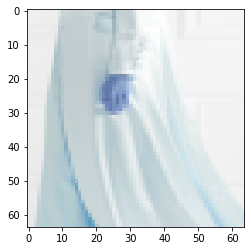

In [ ]:
n = int(input())
result[n].argmax()
if result[n].argmax() == 0:
 plt.imshow(X_image_test[n])
elif result[n].argmax() == 1:
  plt.imshow(X_image_test[n])
elif result[n].argmax() == 2:
 plt.imshow(X_image_test[n])
elif result[n].argmax() == 3:
  plt.imshow(X_image_test[n])

print("Tags for the given image are: ")
for i in X_tag_train[n]:
  try:
   print(list(word_index_test.keys())[list(word_index_test.values()).index(i)],end = ",")
  except:
    pass